In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import neighbors
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import decomposition
import scipy

In [3]:
rawdf = pd.read_csv("creditcard.csv", delimiter = ",")

In [4]:
rawdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
rawdf.shape

(284807, 31)

# First Step: Univariate and Bivariate analysis

In [6]:
rawdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
PCA_list = rawdf.columns[1:29] #contains the labels V1, V2, ..., V28
PCA_index = np.arange(1,29)
print(PCA_index)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


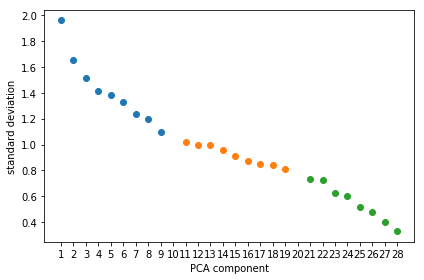

In [8]:
plt.plot(PCA_index[0:9], rawdf[PCA_list[0:9]].std(), 'o')
plt.plot(PCA_index[10:19], rawdf[PCA_list[10:19]].std(), 'o')
plt.plot(PCA_index[20:29], rawdf[PCA_list[20:29]].std(), 'o')
plt.ylabel("standard deviation")
plt.xlabel("PCA component")
plt.xticks(PCA_index)
plt.tight_layout()

#This plot just confirms our expectation that the standard deviation is decreasing for higher PCA components.

In [9]:
PCA_shortlist = list(PCA_list[0:4])
PCA_shortlist.append('Class')
print(PCA_shortlist)

['V1', 'V2', 'V3', 'V4', 'Class']


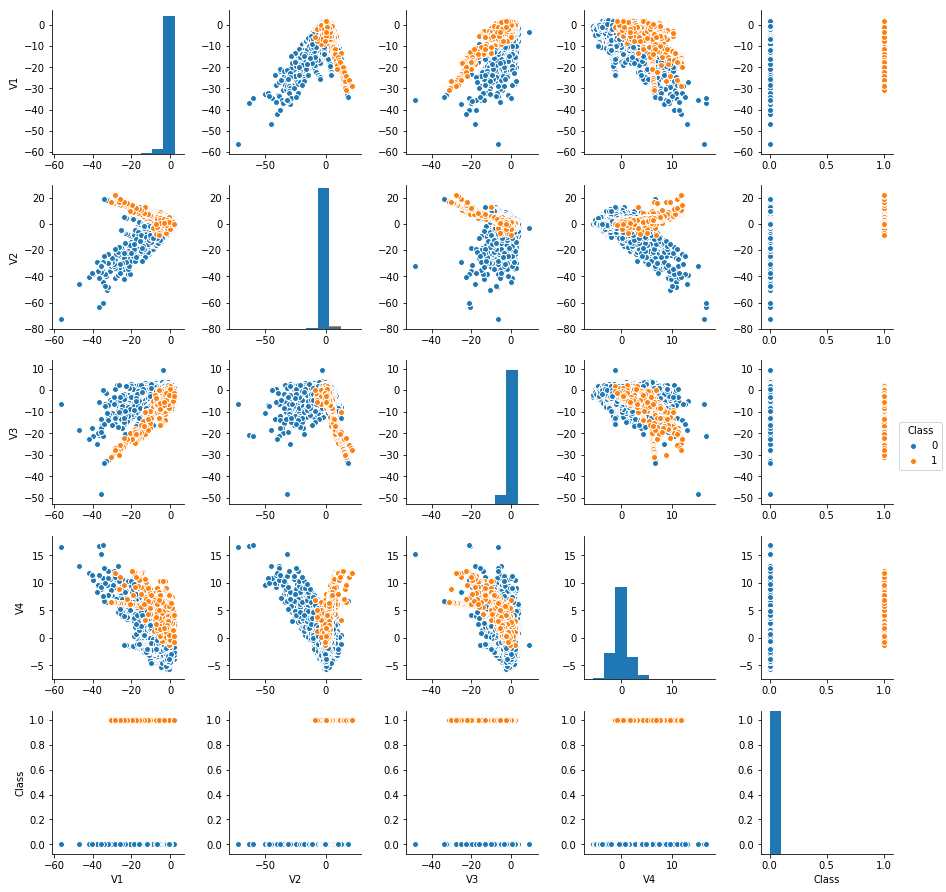

In [10]:
sns.pairplot(rawdf[PCA_shortlist], hue='Class')
plt.show()

Text(0.5,1,'V4')

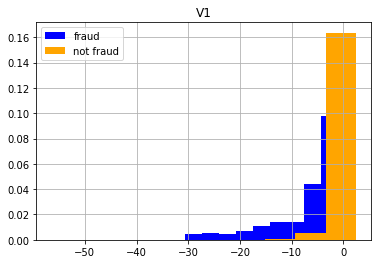

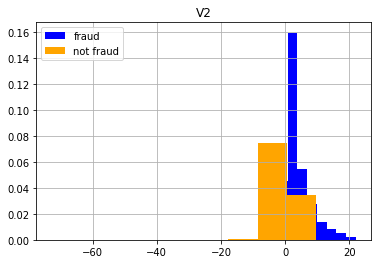

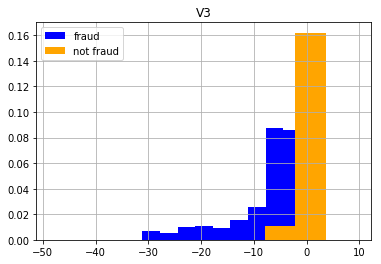

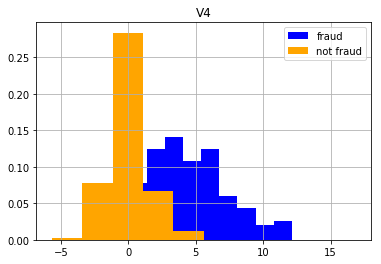

In [29]:
plt.figure()
rawdf[rawdf.Class == 1]["V1"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V1"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V1")

plt.figure()
plt.figure()
rawdf[rawdf.Class == 1]["V2"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V2"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V2")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V3"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V3"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V3")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V4"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V4"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V4")

Text(0.5,1,'V28')

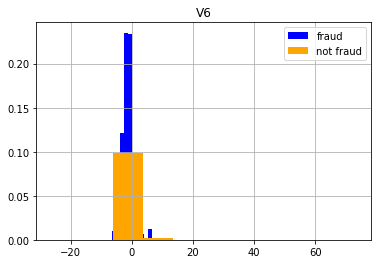

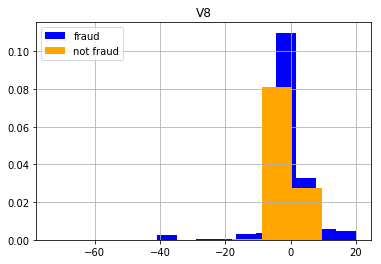

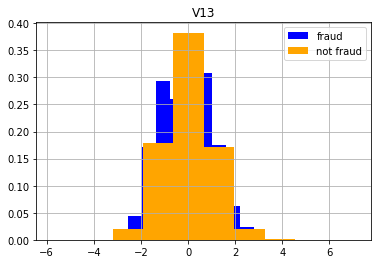

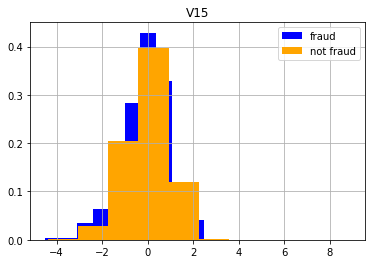

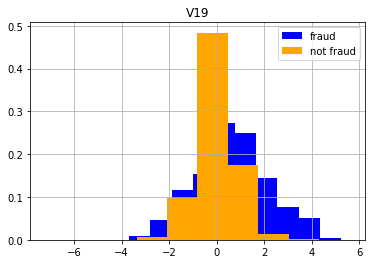

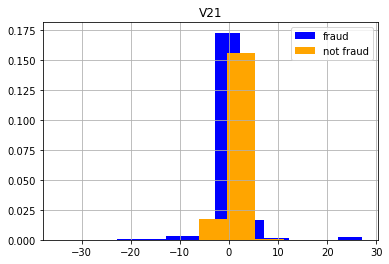

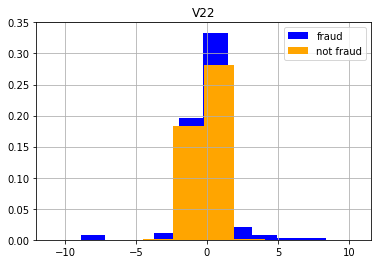

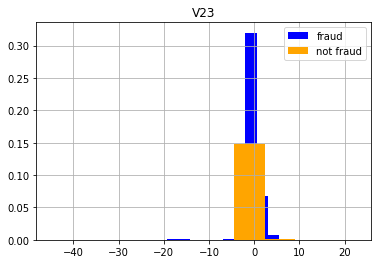

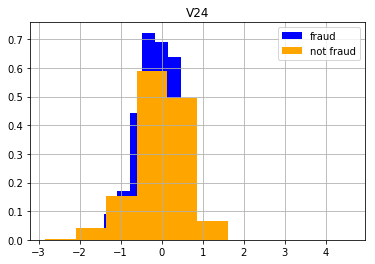

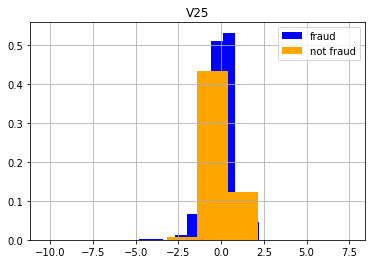

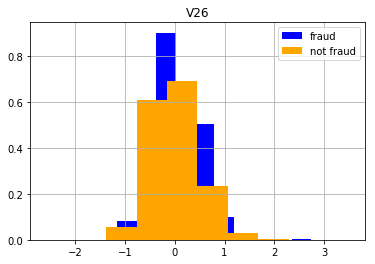

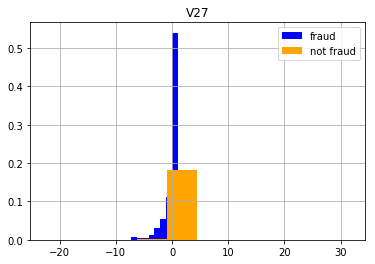

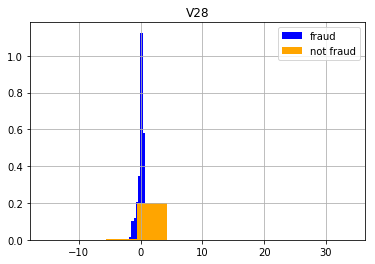

In [59]:
plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V6"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V6"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V6")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V8"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V8"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V8")

plt.figure()
rawdf[rawdf.Class == 1]["V13"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V13"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V13")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V15"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V15"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V15")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V19"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V19"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V19")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V21"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V21"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V21")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V22"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V22"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V22")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V23"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V23"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V23")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V24"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V24"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V24")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V25"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V25"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V25")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V26"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V26"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V26")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V27"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V27"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V27")

plt.figure()
#plt.subplot(1,2,1)
rawdf[rawdf.Class == 1]["V28"].hist(label="fraud", color="blue", density='True')
rawdf[rawdf.Class == 0]["V28"].hist(label="not fraud", color="orange", density='True')
plt.legend()
plt.title("V28")

The plots above suggest cutting out components starting from V19 and above. We can later readjust to verify improvements.
There are also some random components that do not seem to contribute much. V13 and V15 do not seem very useful.

V6 seems also a bit irrelevant. So does V8.

Let's see what correlations tell us.

In [77]:
from scipy.stats import spearmanr
for component in PCA_list:
    print("The current component is "+component)
    print(spearmanr(rawdf[component], rawdf["Class"]))

The current component is V1
SpearmanrResult(correlation=-0.042423503910599056, pvalue=1.3831008872943118e-113)
The current component is V2
SpearmanrResult(correlation=0.05106178228574506, pvalue=1.0176224173864534e-163)
The current component is V3
SpearmanrResult(correlation=-0.05927837684982331, pvalue=5.025821522544823e-220)
The current component is V4
SpearmanrResult(correlation=0.06304529158077311, pvalue=1.1761392551112194e-248)
The current component is V5
SpearmanrResult(correlation=-0.03014747340847084, pvalue=2.8804920544633862e-58)
The current component is V6
SpearmanrResult(correlation=-0.03840984671977728, pvalue=1.9118304569290088e-93)
The current component is V7
SpearmanrResult(correlation=-0.048307897806133336, pvalue=9.941514938966298e-147)
The current component is V8
SpearmanrResult(correlation=0.02270628947684848, pvalue=8.352449380609584e-34)
The current component is V9
SpearmanrResult(correlation=-0.049498795176068346, pvalue=5.835988099500209e-154)
The current compo

The problem with the above is that, since the dataset is vastly dominated by class 0, the correlation is very weak. 
What we will do instead is to quantify the difference between the distributions for every PCA component when class = 0 and when class = 1.

Let's instead compute the KS statistic.

In [78]:
from scipy.stats import ks_2samp

In [101]:
#Null hypothesis: two samples are drawn from the same distribution.
for component in PCA_list:
        print("The current component is "+component)
        print(ks_2samp(rawdf[rawdf.Class==1][component], rawdf[rawdf.Class==0][component]))

The current component is V1
Ks_2sampResult(statistic=0.4753308729911244, pvalue=6.66047999095129e-98)
The current component is V2
Ks_2sampResult(statistic=0.6332012800985509, pvalue=2.0940243533799856e-173)
The current component is V3
Ks_2sampResult(statistic=0.7036817131004787, pvalue=4.673955990176099e-214)
The current component is V4
Ks_2sampResult(statistic=0.7664040757496016, pvalue=7.73599635647677e-254)
The current component is V5
Ks_2sampResult(statistic=0.4364424249469092, pvalue=1.3212551010135104e-82)
The current component is V6
Ks_2sampResult(statistic=0.48642498894433045, pvalue=1.660343743116178e-102)
The current component is V7
Ks_2sampResult(statistic=0.6605775627599584, pvalue=1.096859329064047e-188)
The current component is V8
Ks_2sampResult(statistic=0.36839471821375264, pvalue=5.615221106522386e-59)
The current component is V9
Ks_2sampResult(statistic=0.5763197781459903, pvalue=1.0074875361185202e-143)
The current component is V10
Ks_2sampResult(statistic=0.80429113

The KS metric was also not that helpful. It is simply stating that, given the two samples (class 0 and 1), we know that they are coming from different distributions, and every PCA component is capable of confirming that.

That said, in a real situation, what matters is not a sample, but a single point. Thus, the KS metric ends up not being so helpful in practice. 

Though I have not found a way to quantify this yet, the point is that two distributions that overlap too much will make it hard for a single point to be analyzed and so we will eliminate components for which that happens. For now, this procedure will have to be based on visual inspection. It is worth considering whether this could be made more rigorous later.

Before we proceed, lets look at the variable 'Amount'.

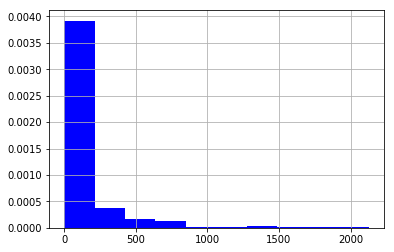

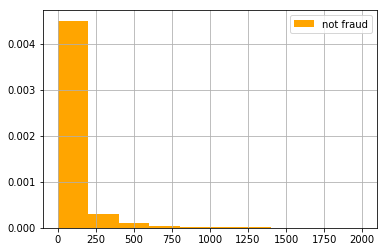

In [143]:
#Before we proceed to the next step, lets look at the variable amount.

plt.figure()
rawdf[rawdf.Class==1]['Amount'].hist(label="fraud", color="blue", density='True')
plt.figure()
rawdf[rawdf.Class==0]['Amount'][rawdf.Amount < 2000].hist(label="not fraud", color="orange", density='True')

plt.legend()

#plt.xlim(-4,4)


2931
9


(0, 400)

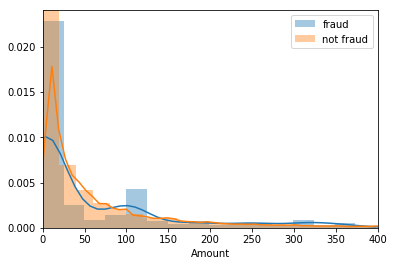

In [165]:
print(rawdf[rawdf.Class==0].Amount[rawdf.Amount > 1000].count())
print(rawdf[rawdf.Class==1].Amount[rawdf.Amount>1000].count())

sns.distplot(rawdf[rawdf.Class==1].Amount[rawdf.Amount < 1000], label='fraud')
sns.distplot(rawdf[rawdf.Class==0].Amount[rawdf.Amount < 1000], label='not fraud')
plt.legend()
plt.xlim(0,400)

# Trying some models

In [166]:
#To have a feel for how good the models can do, we will summon quite a few for a preliminary analysis.

# Data Transformation step

In [372]:
df = rawdf.copy()
cols_to_drop = ["V6", "V8", "V13", "V15", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28",
               "Amount", "Time"]
df.drop(cols_to_drop, inplace=True, axis=1)
df.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class,norm_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0,-0.342474
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0,1.160684
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0,-0.073403


In [373]:
Y = df.Class
X = df.drop("Class", axis=1)

# Calling various models

In [410]:
#Calling a few models

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

MLA = [
    #Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    #ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    #linear_model.PassiveAggressiveClassifier(),
    #linear_model.RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),
    
    #Naives Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    #Trees    
    #tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis()
]

len(MLA)

5

In [411]:
#create table to compare different model metrics
MLA_columns = ['Name', 'Parameters','Train Score Mean', 'Test Score Mean', 'Test STD']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [302]:
#train/test splitting

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#making sure that the variables have mean 0 and variance 1 
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
#X_test_std = sc.transform(X_test)

In [414]:
from sklearn import model_selection
from sklearn.model_selection import  StratifiedKFold, cross_val_score
row_index = 0

cv_method = StratifiedKFold(n_splits=10, shuffle=True)

for model in MLA:
    model_name = model.__class__.__name__
    print(model_name)
    cv_results = model_selection.cross_validate(model, X, Y, 
                                                cv  = cv_method, 
                                                return_train_score=True,
                                                scoring="recall")
    
    
    MLA_compare.loc[row_index, 'Name'] = model_name
    MLA_compare.loc[row_index, 'Parameters'] = str(model.get_params())
    
    MLA_compare.loc[row_index, 'Train Score Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Test Score Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'Test STD'] = cv_results['test_score'].std() 
    
    row_index+=1

RandomForestClassifier
LogisticRegression
GaussianNB
KNeighborsClassifier
ExtraTreeClassifier


In [415]:
MLA_compare.sort_values(by = ['Test Score Mean'], ascending = False, inplace = True)
MLA_compare

,Name,Parameters,Train Score Mean,Test Score Mean,Test STD
2,GaussianNB,{'priors': None},0.849592,0.84951,0.042023
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.80375,0.788612,0.0389185
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.950999,0.772653,0.0609192
4,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.739918,0.0546347
1,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.609976,0.607551,0.0494856


In [218]:
#All the ones above seem to do more or less well, so let's use random forest.

#We will also try oversampling and undersampling simultaneously.

str

In [484]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                stratify=Y, 
                                                test_size=0.3)

In [485]:
#Oversampling 
from imblearn.over_sampling import SMOTE, ADASYN
oversampler = SMOTE(n_jobs=-1, k_neighbors=8)
X_over, Y_over = oversampler.fit_sample(X_train, np.ravel(Y_train))

#undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_under, Y_under = undersampler.fit_sample(X_train, np.ravel(Y_train))

#combining both
from imblearn.combine import SMOTEENN
combined = SMOTEENN()
X_comb, Y_comb = combined.fit_sample(X_train, Y_train)


In [486]:
rf = ensemble.RandomForestClassifier()
rf_over = ensemble.RandomForestClassifier()
rf_under = ensemble.RandomForestClassifier()
rf_comb = ensemble.RandomForestClassifier()

In [487]:
rf.fit(X_train, Y_train)
rf_over.fit(X_over, Y_over)
rf_under.fit(X_under, Y_under)
rf_comb.fit(X_comb, Y_comb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [489]:
Y_pred = rf.predict(X_test)
Y_over_pred = rf_over.predict(X_test)
Y_under_pred = rf_under.predict(X_test)
Y_comb_pred = rf_comb.predict(X_test)

In [490]:
print("Original Sample")
print(classification_report(Y_test, Y_pred))

print("Oversampling")
print(classification_report(Y_test, Y_over_pred))

print("Undersampling")
print(classification_report(Y_test, Y_under_pred))

print("Combined")
print(classification_report(Y_test, Y_comb_pred))


Original Sample
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.91      0.74      0.82       148

avg / total       1.00      1.00      1.00     85443

Oversampling
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.76      0.78      0.77       148

avg / total       1.00      1.00      1.00     85443

Undersampling
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85295
          1       0.05      0.89      0.10       148

avg / total       1.00      0.97      0.98     85443

Combined
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.73      0.78      0.76       148

avg / total       1.00      1.00      1.00     85443



Conclusions:

-Oversampling seems to increase the recall mildly (3 - 5%?) but reduces the precision by about 10-20%
-The combined method seems to do more or less the same as oversampling.
-Undersampling is capable of pushing the recall higher, but hurts precision substantially. Since the number of frauds is small, even a low precision does not lead to a low recall for class 0. Still, we are not at the 99% anymore for recall for class 0.

-Overall, it seems like it might be better to invest some time in undersampling and see if we can do better by fine-tuning next. Before we do so, lets just take a look at the confusion matrices as well.

In [377]:
from sklearn.metrics import confusion_matrix, classification_report

In [491]:
#Function to create a nice plot of the confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[85284    11]
 [   38   110]]
Confusion matrix, without normalization
[[85259    36]
 [   33   115]]
Confusion matrix, without normalization
[[82942  2353]
 [   17   131]]
Confusion matrix, without normalization
[[85253    42]
 [   32   116]]


Text(0.5,1,'random forest with combined over+under')

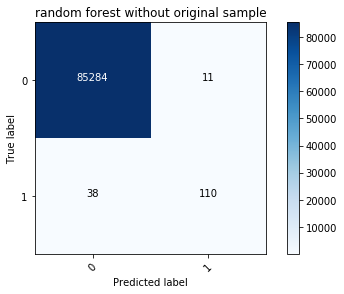

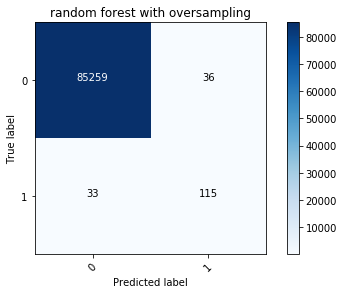

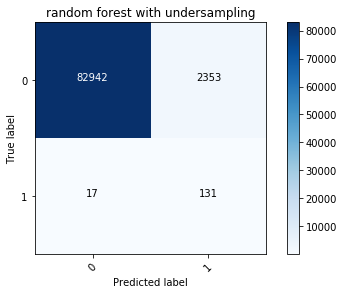

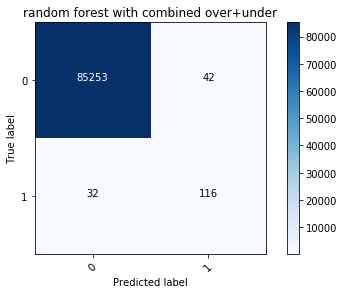

In [493]:
plt.figure()
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, [0,1])
plt.title("random forest without original sample")

plt.figure()
cm = confusion_matrix(Y_test, Y_over_pred)
plot_confusion_matrix(cm, [0,1])
plt.title("random forest with oversampling")

plt.figure()
cm = confusion_matrix(Y_test, Y_under_pred)
plot_confusion_matrix(cm, [0,1])
plt.title("random forest with undersampling")

plt.figure()
cm = confusion_matrix(Y_test, Y_comb_pred)
plot_confusion_matrix(cm, [0,1])
plt.title("random forest with combined over+under")



In [512]:
#Looking at the most important features.
feature_importances = pd.DataFrame(rf_over.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',         
                                                                        ascending=True)
feature_importances

,importance
V2,0.012351
V7,0.012640
V5,0.014748
norm_amount,0.015297
V16,0.016003
V18,0.016224
V1,0.018876
V9,0.018930
V3,0.028225
V11,0.084871


# Finetuning using randomizedsearch

In [524]:
#Let's start by reducing our space even further
X_train.drop(["V3","V1","norm_amount", "V18", "V7", "V5", "V16"], axis=1, inplace=True)
X_test.drop(["V3","V1","norm_amount", "V18", "V7", "V5", "V16"], axis=1, inplace=True)

In [522]:
#Let's check that this did not impact performance much.
rf_drop = ensemble.RandomForestClassifier()
rf_drop.fit(X_train, Y_train)
Y_pred = rf_drop.predict(X_test)
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.90      0.76      0.82       148

avg / total       1.00      1.00      1.00     85443



In [545]:
#Now, randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#parameter space
param_space = {"max_depth": [3, 5, 7, None],
              "max_features": sp_randint(1, 7),
              "n_estimators": sp_randint(10,30)}

n_iter_search = 10

model = ensemble.RandomForestClassifier()

cv_method = StratifiedKFold(n_splits=5, shuffle=True)

rf_randomsearch = RandomizedSearchCV(model,
                    param_distributions = param_space, 
                    n_iter = n_iter_search,
                                  cv = cv_method, scoring='recall') 

rf_randomsearch.fit(X_train, np.ravel(Y_train))

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, 5, 7, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x127e1b9e8>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x127e1b208>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='recall', verbose=0)

In [546]:
Y_random_pred = rf_randomsearch.predict(X_test)

In [547]:
print(classification_report(Y_test, Y_random_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85295
          1       0.92      0.77      0.84       148

avg / total       1.00      1.00      1.00     85443



In [548]:
rf_randomsearch.grid_scores_

/Users/hudsonps/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.78794, std: 0.04853, params: {'max_depth': None, 'max_features': 4, 'n_estimators': 29},
 mean: 0.76479, std: 0.05975, params: {'max_depth': 7, 'max_features': 1, 'n_estimators': 21},
 mean: 0.77638, std: 0.04566, params: {'max_depth': 5, 'max_features': 6, 'n_estimators': 28},
 mean: 0.78504, std: 0.04919, params: {'max_depth': 7, 'max_features': 6, 'n_estimators': 26},
 mean: 0.69228, std: 0.08636, params: {'max_depth': 5, 'max_features': 1, 'n_estimators': 16},
 mean: 0.75315, std: 0.04677, params: {'max_depth': 5, 'max_features': 2, 'n_estimators': 14},
 mean: 0.73295, std: 0.07296, params: {'max_depth': 3, 'max_features': 6, 'n_estimators': 14},
 mean: 0.77638, std: 0.04473, params: {'max_depth': None, 'max_features': 3, 'n_estimators': 16},
 mean: 0.79667, std: 0.05378, params: {'max_depth': None, 'max_features': 3, 'n_estimators': 17},
 mean: 0.58747, std: 0.05543, params: {'max_depth': 3, 'max_features': 1, 'n_estimators': 16}]

In [596]:
#Now, randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint



from imblearn.under_sampling import InstanceHardnessThreshold
logistic = linear_model.LogisticRegression()
under_IHT = InstanceHardnessThreshold(estimator=logistic)

X_under_random, Y_under_random = undersampler.fit_sample(X_train, np.ravel(Y_train))



(array([344.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 344.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

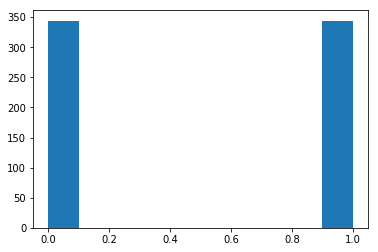

In [597]:
plt.hist(Y_under_random)

In [611]:
n_iter_search = 100

model = ensemble.RandomForestClassifier()

cv_method = StratifiedKFold(n_splits=5, shuffle=True)

#parameter space
param_space = {"max_depth": [3],
              "max_features": [2],
              "n_estimators": [261],
              }

rf_under_randomsearch = RandomizedSearchCV(model,
                    param_distributions = param_space, 
                    n_iter = n_iter_search,
                                  cv = cv_method, scoring='precision') 

rf_under_randomsearch.fit(X_under_random, np.ravel(Y_under_random))

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_depth': [3, 5, 7, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118fdc668>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118fdc438>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='precision', verbose=0)

In [612]:
Y_under_random_pred = rf_under_randomsearch.predict(X_test)
print(classification_report(Y_test, Y_under_random_pred))
print(rf_under_randomsearch.best_params_)

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85295
          1       0.18      0.83      0.30       148

avg / total       1.00      0.99      1.00     85443

{'max_depth': 3, 'max_features': 1, 'n_estimators': 260}


Confusion matrix, without normalization
[[84739   556]
 [   25   123]]


Text(0.5,1,'random forest with under and randomized search')

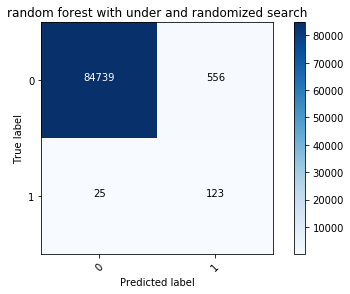

In [613]:
plt.figure()
cm = confusion_matrix(Y_test, Y_under_random_pred)
plot_confusion_matrix(cm, [0,1])
plt.title("random forest with under and randomized search")

In [615]:
#parameters used
parameter_list = rf_under_randomsearch.best_params_

In [616]:
parameter_list

{'max_depth': 3, 'max_features': 1, 'n_estimators': 260}

In [618]:
ensemble.RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)